In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import string
from wordcloud import WordCloud
import operator
import preprocessor as p

## Reading Data

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Twitter\Tweets Data.csv')

In [3]:
df.head()

,Tweets,target(fake=0)
0,We have Good News. Covaxin is first vaccine...,1
1,The country's 'first' indigenous COVID-19 vac...,1
2,"India's first COVID-19 vaccine candidate, COVA...",1
3,AnilDeshmukhNCP PypAyurved @yogrishiramdev You...,1
4,"MoHaP announces 421 new COVID_19 cases, 490 re...",1


In [4]:
df.shape

(3067, 2)

## Preprocessing Tweets

In [5]:
def preprocess_text(text):
    
    # Removing special syntax
    text = re.sub(r"(b')+" , "" , text)
    
    # Removing URls
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(https?://[^\s]+))' , "" , text)
    text = re.sub(r'http\S+' , "" , text)

    # Removing Usernames
    text = re.sub(r'@[^\s]+' , "" , text)
    
    # Removing Hashtags
    text = re.sub(r'#([^\s]+)' , r'\1' , text)
    
    # Removing HTML Tags
    text = re.sub(r'<.*?>' , "" , text)
    
    # Removing Emogis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) 
    
    # Removing special Emogis
    text = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")")
                 )    
    
    # Lower and stopwords removal
    text = " ".join([word for word in text.lower().split() if not word in set(stopwords.words('english'))])
    
    # Punctuation Removal
    text = "".join([char if char not in string.punctuation else ' ' for char in text])
    
    # Number Removal
    text = re.sub(r"[^A-Z a-z]" , "" , text)
    
    # Emogi Residual Removal
    text = re.sub(r"x[a-z]+ " , "" , text)
    
    # Removing words or length less than 2
    text = " ".join([word for word in text.split() if len(word)>2])
    
    # Removing double and trailing spaces
    text = " ".join(text.split())
    
    # Similar word removal
    corona_similar = ['novelcoronavirus' , 'covid19' , 'covid' , 'corona' , 'coronavirus']
    india_similar = ['indian']
    for word in corona_similar:
        text = re.sub(word , "corona" , text)
    for word in india_similar:
        text = re.sub(word , "india" , text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    '''
    # Stemming
    ps = PorterStemmer()
    text = " ".join([ps.stem(word) for word in text.split()])
    '''
    return text

In [6]:
p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.SMILEY)
df['Tweets'] = df['Tweets'].apply(lambda x : p.clean(x))
df['Tweets'] = df['Tweets'].apply(lambda x : preprocess_text(x))

## Word Frequency Count

In [7]:
tweet = ''
data = df[df["target(fake=0)"]==1].reset_index(drop=True)
for i in range(len(data)):
    tweet += data.loc[i,'Tweets'] + " "
tweet = tweet.split(" ")

unique = []
for word in tweet:
    if word not in unique:
        unique.append(word)
        
word_dict = dict(zip(unique , np.zeros(len(unique))))
for word in tweet:
    word_dict[word] += 1
    
word_dict = dict(sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True))

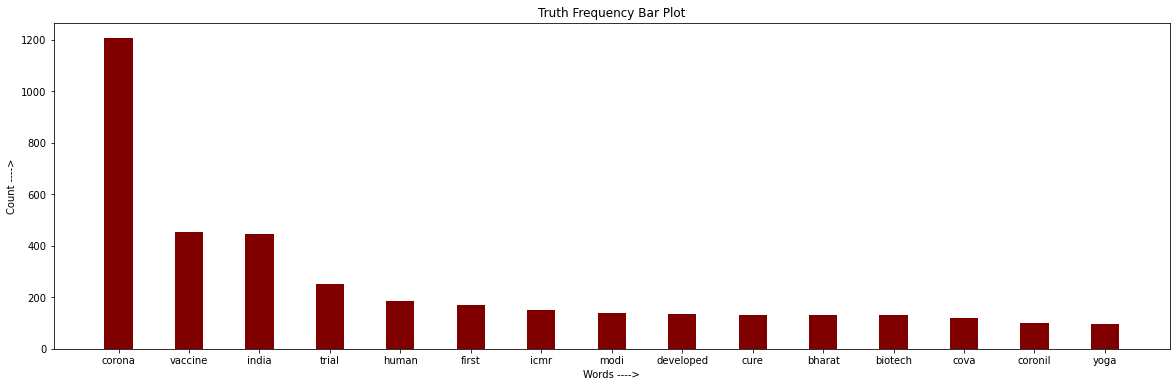

In [8]:
plt.figure(figsize=(20,6))
count = 15
plt.bar(list(word_dict.keys())[:count], list(word_dict.values())[:count], color ='maroon', width = 0.4) 
plt.xlabel("Words ---->") 
plt.ylabel("Count ---->") 
plt.title("Truth Frequency Bar Plot")
plt.show() 

In [9]:
tweet = ''
data = df[df["target(fake=0)"]==0].reset_index(drop=True)
for i in range(len(data)):
    tweet += data.loc[i,'Tweets'] + " "
tweet = tweet.split(" ")

unique = []
for word in tweet:
    if word not in unique:
        unique.append(word)
        
word_dict = dict(zip(unique , np.zeros(len(unique))))
for word in tweet:
    word_dict[word] += 1
    
word_dict = dict(sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True))

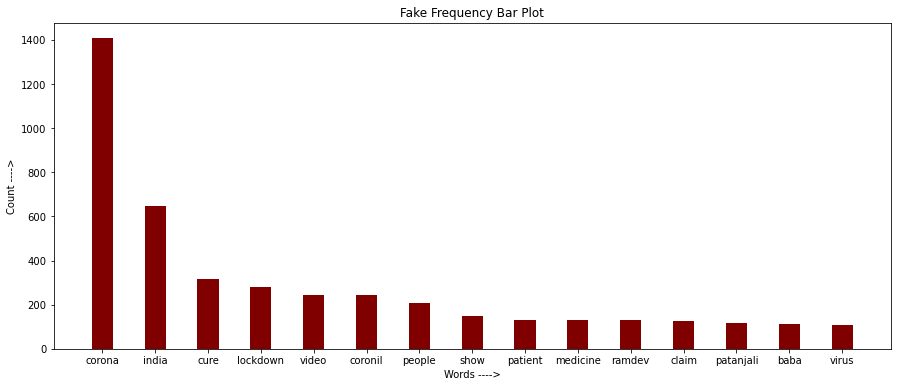

In [10]:
plt.figure(figsize=(15,6))
count = 15
plt.bar(list(word_dict.keys())[:count], list(word_dict.values())[:count], color ='maroon', width = 0.4) 
plt.xlabel("Words ---->") 
plt.ylabel("Count ---->") 
plt.title("Fake Frequency Bar Plot")
plt.show() 

## Word Cloud

In [11]:
fake = ''
data = df[df["target(fake=0)"]==0].reset_index(drop=True)
for i in range(len(data)):
    sentence = data.loc[i,"Tweets"]
    fake += sentence+" "

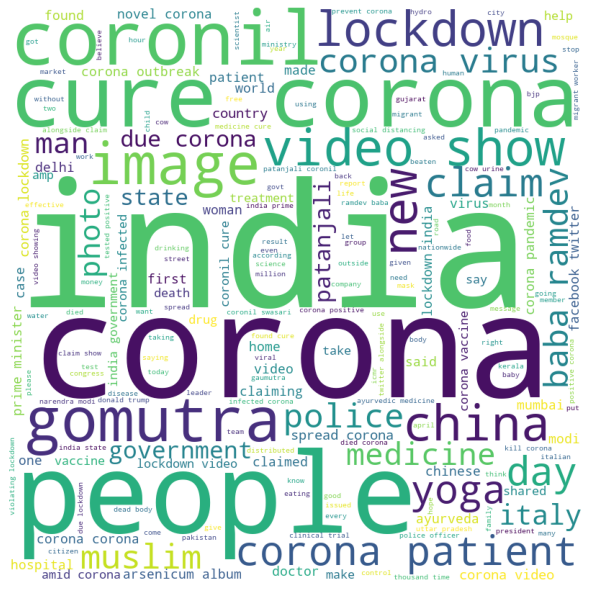

In [12]:
wordcloud_fake = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(fake)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [13]:
truth = ''
data = df[df["target(fake=0)"]==0].reset_index(drop=True)
for i in range(len(data)):
    sentence = data.loc[i,"Tweets"]
    truth += sentence+" "

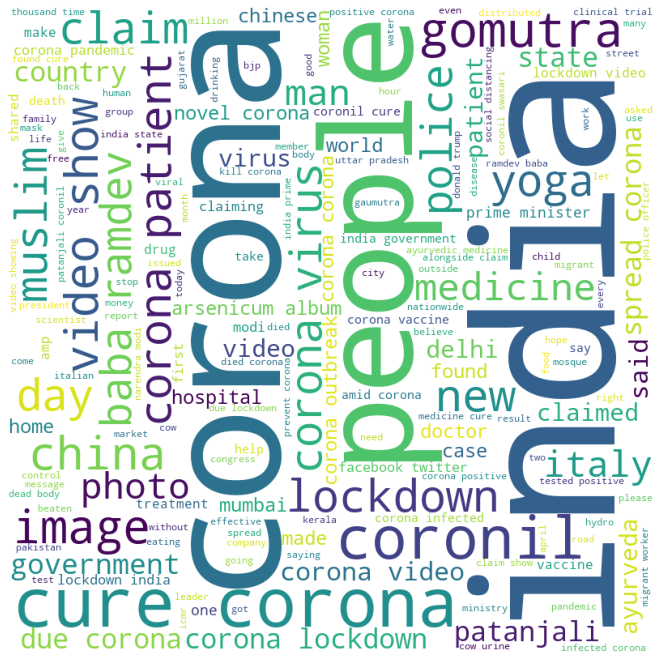

In [14]:
wordcloud_truth = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(truth)

plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud_truth) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [15]:
#wordcloud_fake.to_file(r'C:\Users\admin\Downloads\Twitter\Fake.jpeg')
#wordcloud_truth.to_file(r'C:\Users\admin\Downloads\Twitter\True.jpeg')

### Saving clean data as a new csv

In [16]:
df.to_csv('Clean Data.csv' , index=False , header=True)